In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aradhanahirapara/farm-produce-data-80-years")

print("Path to dataset files:", path)

d:\Skills\Data-Analysis-With-Python\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Arshad Ziban\.cache\kagglehub\datasets\aradhanahirapara\farm-produce-data-80-years\versions\2


In [3]:
import os

# List all files and subfolders in the dataset directory
print("Files in the dataset directory:")
print(os.listdir(path))

Files in the dataset directory:
['farm_production_dataset.csv']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use the actual file name you found
correct_file_name = "farm_production_dataset.csv" 
file_path = os.path.join(path, correct_file_name)

In [5]:
# Read and show the dataset
df = pd.read_csv(file_path)
df.head()

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


In [6]:
df.isnull().sum()

REF_DATE                                    0
GEO                                         0
Type of crop                                1
Average farm price (dollars per tonne)     30
Average yield (kilograms per hectare)      27
Production (metric tonnes)                 28
Seeded area (acres)                       400
Seeded area (hectares)                    426
Total farm value (dollars)                  0
dtype: int64

In [7]:
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].min(), inplace=True)

C:\Users\Arshad Ziban\AppData\Local\Temp\ipykernel_20832\1119480267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].min(), inplace=True)


In [8]:
df.isnull().sum()

REF_DATE                                  0
GEO                                       0
Type of crop                              1
Average farm price (dollars per tonne)    0
Average yield (kilograms per hectare)     0
Production (metric tonnes)                0
Seeded area (acres)                       0
Seeded area (hectares)                    0
Total farm value (dollars)                0
dtype: int64

In [13]:
df['REF_DATE'].min()

np.int64(1908)

In [14]:
df['REF_DATE'].max()

np.int64(1984)

In [15]:
#Which provinces are represented?
df['GEO'].unique()

array(['AB', 'BC', 'CA', 'MA', 'MP', 'NB', 'NS', 'ON', 'PP', 'PEI', 'QU',
       'SK', ' ', 'NL'], dtype=object)

In [16]:
#What are the most common crops?
df['Type of crop'].value_counts().head(5)

Type of crop
Barley          924
Oats            924
Wheat, all      924
Tame hay        924
Mixed grains    914
Name: count, dtype: int64

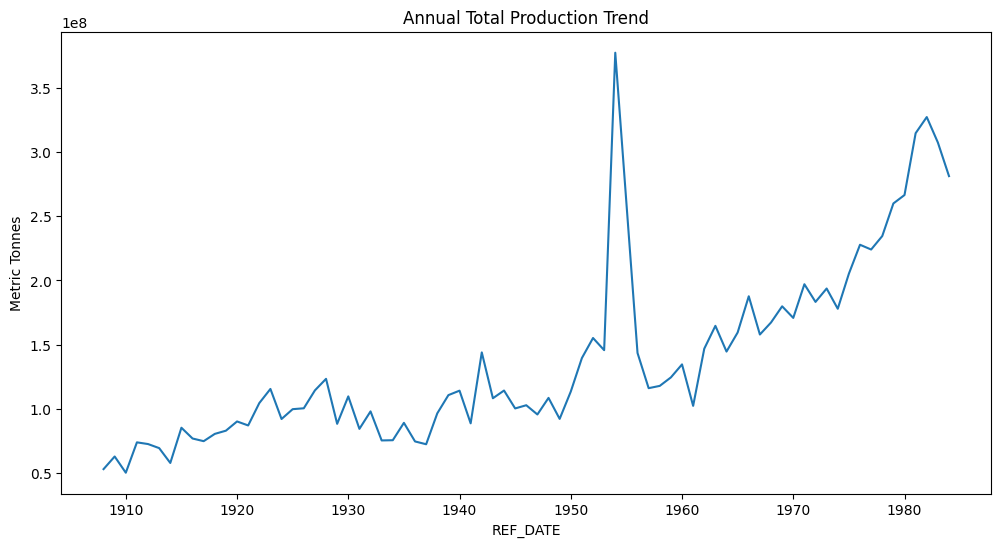

In [19]:
#How does production vary by year?
plt.figure(figsize=(12,6))
df.groupby('REF_DATE')['Production (metric tonnes)'].sum().plot()
plt.title("Annual Total Production Trend")
plt.ylabel("Metric Tonnes")
plt.show()

In [20]:
#Which province has the highest average yield?
prov_yield = df.groupby('GEO')['Average yield (kilograms per hectare)'].mean()

In [21]:
prov_yield

GEO
       1860.000000
AB     3706.071770
BC     4920.343137
CA     4264.111111
MA     3059.990942
MP     2753.227384
NB     3049.139610
NL     3985.000000
NS     3071.468254
ON     4581.390077
PEI    1982.030534
PP     4385.242604
QU     4573.429622
SK     1713.657262
Name: Average yield (kilograms per hectare), dtype: float64

In [27]:
(prov_yield.idxmax(), prov_yield.max())

('BC', np.float64(4920.343137254902))

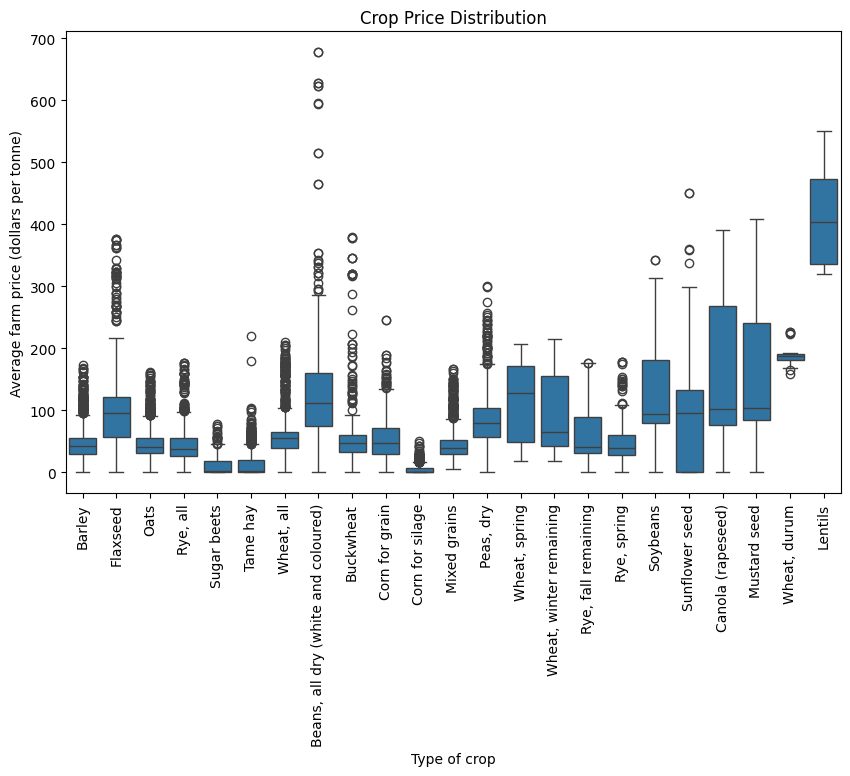

In [28]:
# What's the price distribution of crops?
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Type of crop', y='Average farm price (dollars per tonne)')
plt.xticks(rotation=90)
plt.title("Crop Price Distribution")
plt.show()